Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995
Pearson Correlation Coefficient: 0.6779729382980617


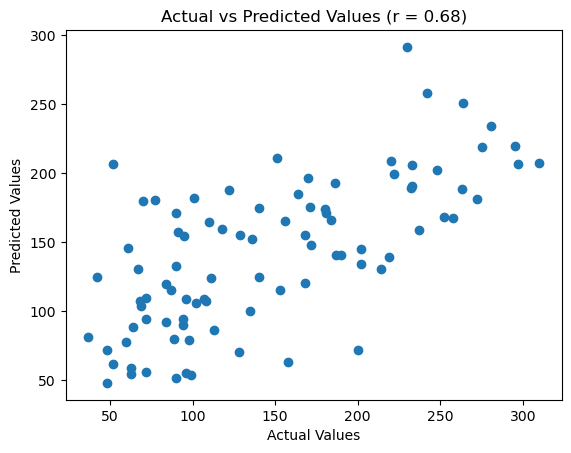

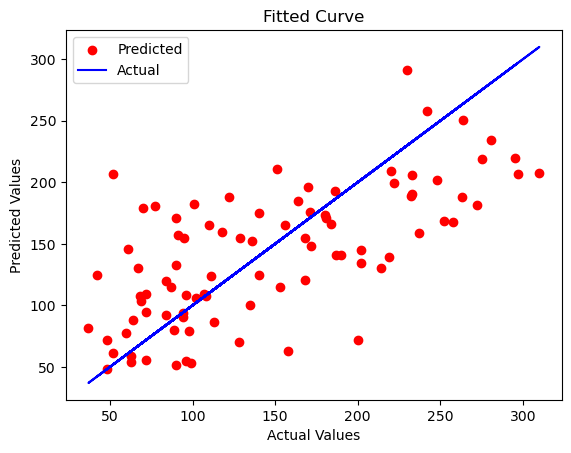

  Metric        Value
0    MAE    42.794095
1    MSE  2900.193628
2   RMSE    53.853446
3     R2     0.452603


d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 加载数据集
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# 分离特征和目标
X = df.drop('Target', axis=1)
y = df['Target']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 输出系数和截距
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 生成预测值
y_pred = model.predict(X_test)

# 计算pearson相关系数
r = pearsonr(y_test, y_pred)[0]
print("Pearson Correlation Coefficient:", r)

# 绘制预测值与实际值的散点图
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (r = {:.2f})'.format(r))
plt.show()

# 绘制拟合曲线
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.plot(y_test, y_test, color='blue', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Fitted Curve')
plt.legend()
plt.show()

# 计算指标
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# 存储指标到数据框
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

print(metrics_df)


In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 加载数据集
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化SGD回归模型
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, random_state=42)

# 训练模型
sgd_regressor.fit(X_train, y_train)

# 进行预测
y_pred = sgd_regressor.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 可以计算均方根误差（RMSE）来更好地理解误差
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 4.917250740009454e+31
Root Mean Squared Error: 7012311131153162.0


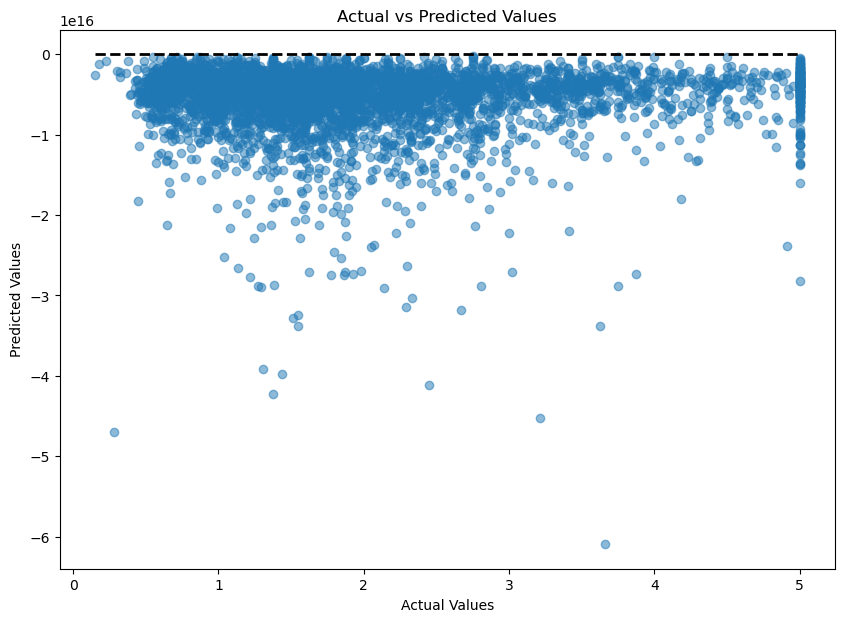

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 加载数据集
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化SGD回归模型
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, random_state=42)

# 训练模型
sgd_regressor.fit(X_train, y_train)

# 进行预测
y_pred = sgd_regressor.predict(X_test)

# 绘制散点图
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha设置透明度

# 绘制参考线
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

# 添加标签和标题
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# 显示图表
plt.show()

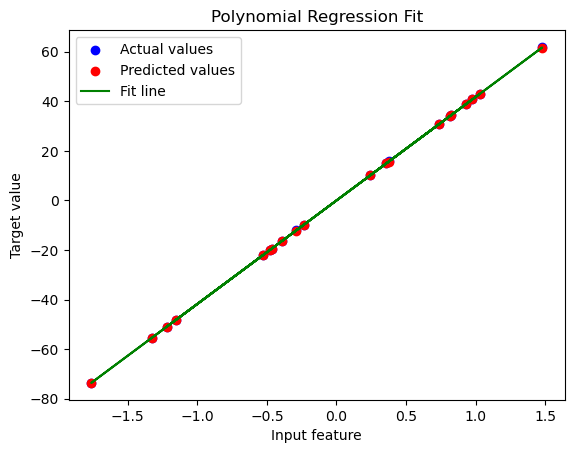

   Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R^2 Score
0             0.084137            0.010543                 0.102681   0.999992


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 生成模拟数据
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用PolynomialFeatures生成多项式特征
degree = 2  # 多项式的度数
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# 使用线性回归模型进行训练
linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)

# 进行预测
y_pred = linear_regression.predict(X_test_poly)

# 可视化实际值与预测值
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.plot(X_test, y_pred, color='green', label='Fit line')
plt.xlabel('Input feature')
plt.ylabel('Target value')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# 误差评估
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 将误差指标存储到DataFrame中
import pandas as pd
error_metrics = pd.DataFrame({
    'Mean Absolute Error': [mae],
    'Mean Squared Error': [mse],
    'Root Mean Squared Error': [rmse],
    'R^2 Score': [r2]
})

print(error_metrics)


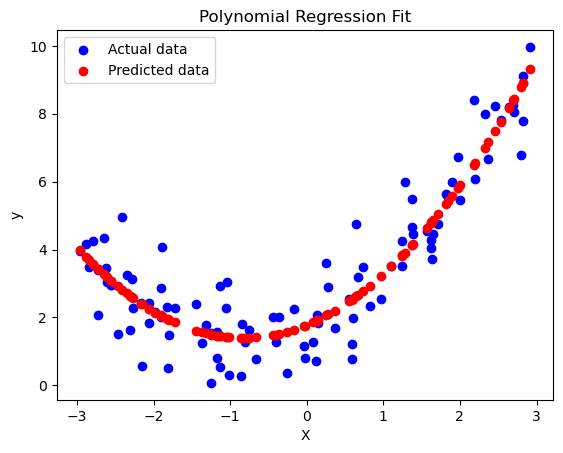

   Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R^2 Score
0             0.677864            0.777194                 0.881586   0.852507


d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 生成数据集
np.random.seed(42)  # 设置随机种子以确保结果可重复

# 生成X
X = np.random.uniform(-3, 3, (100, 1))

# 生成y
y = 0.5 * X**2 + 1.0 * X + 2.0 + np.random.normal(0, 1, (100, 1))

# 查看前5个数据点
X[:5], y[:5]


# 使用PolynomialFeatures生成多项式特征
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 创建线性回归模型
model = LinearRegression()
model.fit(X_poly, y)

# 进行预测
y_pred = model.predict(X_poly)

# 可视化结果
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X, y_pred, color='red', label='Predicted data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# 误差评估
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# 将误差指标存储到DataFrame中
error_metrics = pd.DataFrame({
    'Mean Absolute Error': [mae],
    'Mean Squared Error': [mse],
    'Root Mean Squared Error': [rmse],
    'R^2 Score': [r2]
})

print(error_metrics)


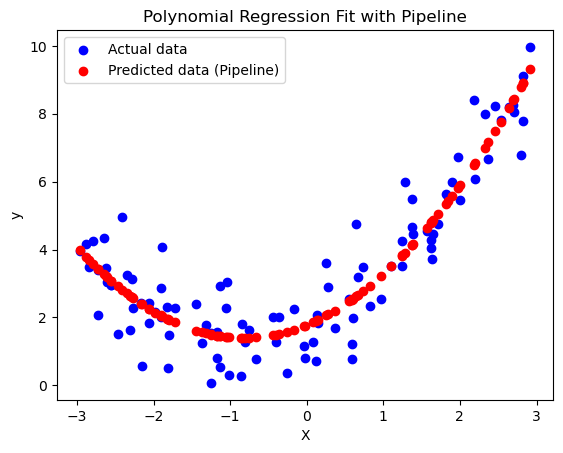

   Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R^2 Score
0             0.677864            0.777194                 0.881586   0.852507


d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [4]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 生成数据集
np.random.seed(42)  # 设置随机种子以确保结果可重复

# 生成X
X = np.random.uniform(-3, 3, (100, 1))

# 生成y
y = 0.5 * X**2 + 1.0 * X + 2.0 + np.random.normal(0, 1, (100, 1))

# 创建一个管道，包含多项式特征生成和线性回归模型
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),  # 标准化，使模型训练更稳定
    LinearRegression()
)

# 使用管道进行训练和预测
pipeline.fit(X, y)
y_pred_pipeline = pipeline.predict(X)

# 可视化结果
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X, y_pred_pipeline, color='red', label='Predicted data (Pipeline)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit with Pipeline')
plt.legend()
plt.show()

# 误差评估
mae = mean_absolute_error(y, y_pred_pipeline)
mse = mean_squared_error(y, y_pred_pipeline)
rmse = mean_squared_error(y, y_pred_pipeline, squared=False)
r2 = r2_score(y, y_pred_pipeline)

# 将误差指标存储到DataFrame中
error_metrics = pd.DataFrame({
    'Mean Absolute Error': [mae],
    'Mean Squared Error': [mse],
    'Root Mean Squared Error': [rmse],
    'R^2 Score': [r2]
})

print(error_metrics)

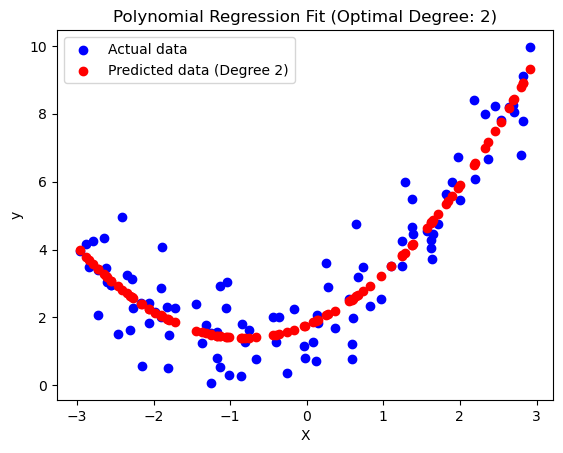

2 [3.0550044479011254, 0.8499123227095694, 0.8747575446292476, 0.9035502526080172, 0.9250141271501384, 0.9479949644418303, 0.9665635519212736, 0.9871699776295492, 1.0615036901757167, 1.072132778417155, 0.9983309012823909, 1.0146987100505709, 1.0551606347135514, 1.1342885097957436, 1.3643332538890025, 1.4012865768332643, 2.319212548330695, 7.977796293406601, 17.441667001469757, 25.024028341528318]


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 设置随机种子以确保结果可重复
np.random.seed(42)

# 生成数据集
X = np.random.uniform(-3, 3, (100, 1))
y = 0.5 * X**2 + 1.0 * X + 2.0 + np.random.normal(0, 1, (100, 1))

# 存储不同阶数模型的交叉验证分数
cv_scores = []

# 对1-20阶进行拟合和交叉验证
for degree in range(1, 21):
    # 生成多项式特征
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # 创建线性回归模型
    model = LinearRegression()
    # 使用5折交叉验证
    scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=5)
    # 记录平均分数
    cv_scores.append(-np.mean(scores))  # 取负值，因为我们希望最小化MSE

# 找到具有最佳交叉验证分数的阶数
optimal_degree = np.argmin(cv_scores) + 1  # 加1是因为索引从0开始

# 使用最佳阶数进行最终拟合
poly_optimal = PolynomialFeatures(degree=optimal_degree, include_bias=False)
X_poly_optimal = poly_optimal.fit_transform(X)
model_optimal = LinearRegression()
model_optimal.fit(X_poly_optimal, y)
y_pred_optimal = model_optimal.predict(X_poly_optimal)

# 可视化结果
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X, y_pred_optimal, color='red', label=f'Predicted data (Degree {optimal_degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Regression Fit (Optimal Degree: {optimal_degree})')
plt.legend()
plt.show()

# 返回最佳阶数和交叉验证分数
print(optimal_degree, cv_scores)

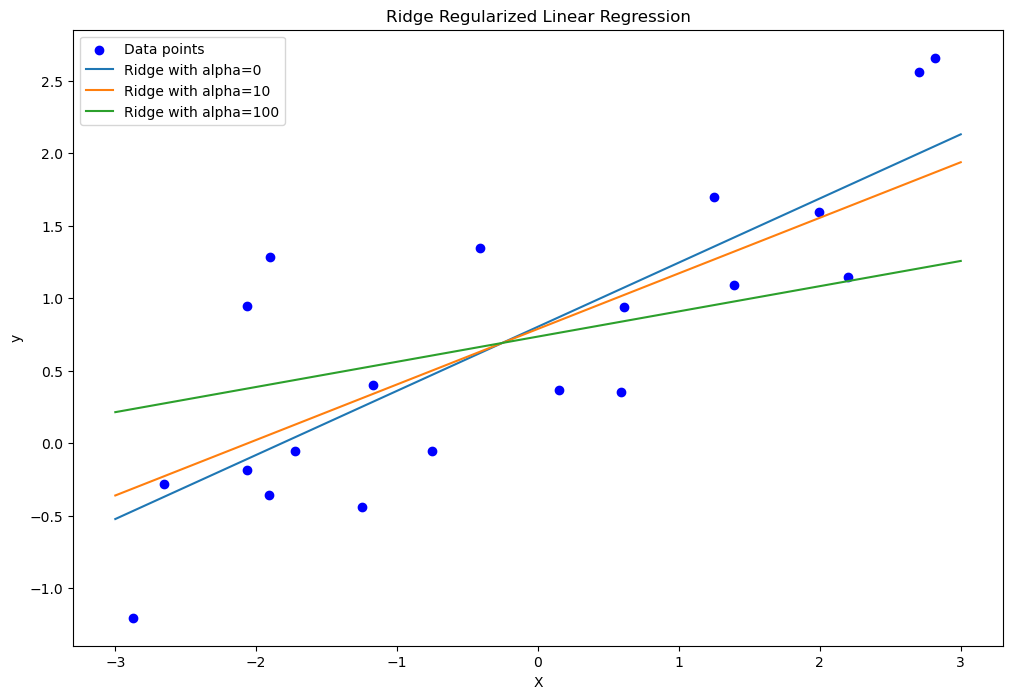

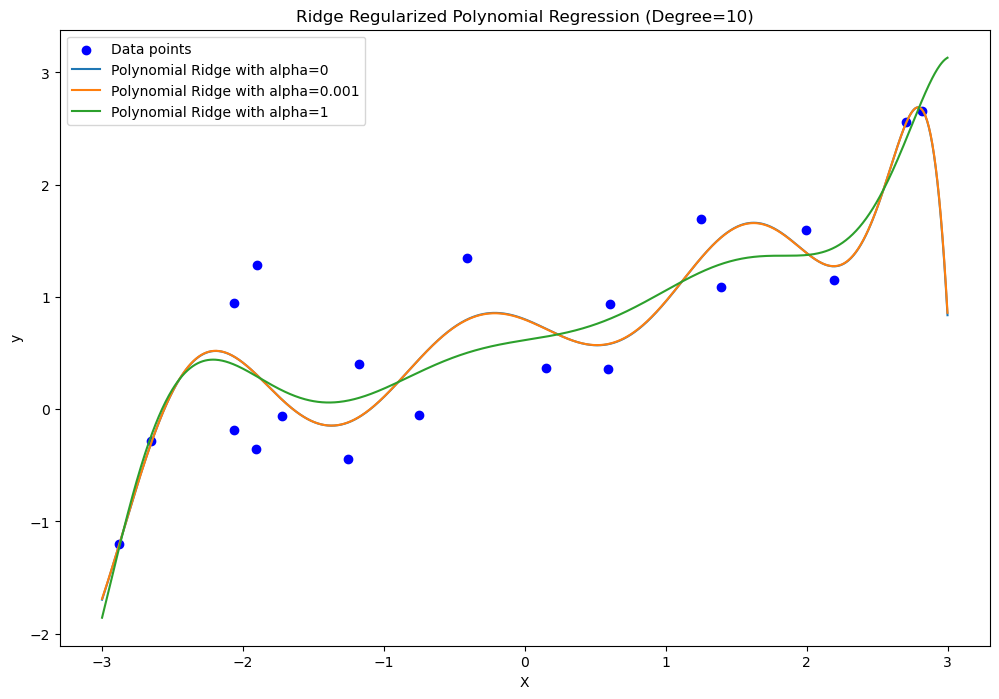

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# 生成带白噪声的线性数据集
np.random.seed(42)
X = np.random.uniform(-3, 3, (20, 1))
y = 1 + 0.5 * X + np.random.randn(20, 1) / 1.5

# 使用岭正则化的线性回归拟合数据集
alphas = [0, 10, 100]
X_new = np.linspace(-3, 3, 1000).reshape(-1, 1)

plt.figure(figsize=(12, 8))

# 绘制原始数据点
plt.scatter(X, y, color='blue', label='Data points')

# 对于每个alpha值，拟合模型并绘制结果
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    y_new = model.predict(X_new)
    plt.plot(X_new, y_new, label=f'Ridge with alpha={alpha}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regularized Linear Regression')
plt.legend()
plt.show()

# 使用岭正则多项式回归拟合数据集
alphas_poly = [0, 10**-3, 1]
poly = PolynomialFeatures(degree=10)

plt.figure(figsize=(12, 8))

# 绘制原始数据点
plt.scatter(X, y, color='blue', label='Data points')

# 对于每个alpha值，拟合模型并绘制结果
for alpha in alphas_poly:
    model_poly_pipeline = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=alpha))
    model_poly_pipeline.fit(X, y)
    y_new_poly_pipeline = model_poly_pipeline.predict(X_new)
    plt.plot(X_new, y_new_poly_pipeline, label=f'Polynomial Ridge with alpha={alpha}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regularized Polynomial Regression (Degree=10)')
plt.legend()
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# 加载加州房价数据集
data = fetch_california_housing()
X = data.data
y = data.target

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 线性回归
linear_model = make_pipeline(StandardScaler(), LinearRegression())
linear_model.fit(X_train, y_train)
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)
print(f"Linear Regression - Train Score: {r2_score(y_train, y_train_pred)}, Test Score: {r2_score(y_test, y_test_pred)}")

# 10阶多项式特征扩展
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = make_pipeline(StandardScaler(), LinearRegression())
poly_model.fit(X_train_poly, y_train)
y_train_poly_pred = poly_model.predict(X_train_poly)
y_test_poly_pred = poly_model.predict(X_test_poly)
print(f"Polynomial Regression (Degree 10) - Train Score: {r2_score(y_train, y_train_poly_pred)}, Test Score: {r2_score(y_test, y_test_poly_pred)}")

# 计算Pearson相关系数并绘制散点图
pearson_coeff, _ = pearsonr(y_test, y_test_poly_pred)
plt.scatter(y_test, y_test_poly_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Pearson Correlation: {pearson_coeff}")
plt.show()

# 岭回归正则化
alphas = [10, 1, 0.1, 0.001, 0.00001]
ridge_coefs = []
for alpha in alphas:
    ridge_model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=10, include_bias=False), Ridge(alpha=alpha))
    ridge_model.fit(X_train, y_train)
    y_train_ridge_pred = ridge_model.predict(X_train)
    y_test_ridge_pred = ridge_model.predict(X_test)
    print(f"Ridge Regression (alpha={alpha}) - Train Score: {r2_score(y_train, y_train_ridge_pred)}, Test Score: {r2_score(y_test, y_test_ridge_pred)}")
    ridge_coefs.append(ridge_model.named_steps['ridge'].coef_)

# 绘制回归系数散点图
plt.figure(figsize=(10, 6))
for i, coef in enumerate(ridge_coefs):
    plt.plot(poly_features.get_feature_names_out(), coef, label=f"Alpha: {alphas[i]}")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Ridge Regression Coefficients")
plt.legend()
plt.show()

# Lasso正则化
alphas_lasso = [0.01, 0.001, 0.00001]
lasso_coefs = []
for alpha in alphas_lasso:
    lasso_model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=10, include_bias=False), Lasso(alpha=alpha, max_iter=100000))
    lasso_model.fit(X_train, y_train)
    y_train_lasso_pred = lasso_model.predict(X_train)
    y_test_lasso_pred = lasso_model.predict(X_test)
    print(f"Lasso Regression (alpha={alpha}) - Train Score: {r2_score(y_train, y_train_lasso_pred)}, Test Score: {r2_score(y_test, y_test_lasso_pred)}")
    lasso_coefs.append(lasso_model.named_steps['lasso'].coef_)

# 绘制回归系数散点图
plt.figure(figsize=(10, 6))
for i, coef in enumerate(lasso_coefs):
    plt.plot(poly_features.get_feature_names_out(), coef, label=f"Alpha: {alphas_lasso[i]}")
plt.xlabel("Features")
plt.ylabel("Coefficients")


Linear Regression - Train Score: 0.6125511913966952, Test Score: 0.5757877060324508


MemoryError: Unable to allocate 5.38 GiB for an array with shape (16512, 43757) and data type float64

In [9]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = house.data, house.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, 
random_state=42)
lr = LinearRegression().fit(X_train,y_train)
print("训练集 R-score:{:.2f}".format(lr.score(X_train,y_train)))
print("测试集 R-score:{:.2f}".format(lr.score(X_test,y_test)))

训练集 R-score:0.61
测试集 R-score:0.58


In [11]:
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
import numpy as np
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
poly = PolynomialFeatures(degree=2,include_bias=False)
X_trained = poly.fit_transform(X_train_scaled)
X_tested = poly.transform(X_test_scaled)
polylr = LinearRegression().fit(X_trained,y_train)
print("训练集得分:{:.2f}".format(polylr.score(X_trained,y_train)))
print("测试集得分:{:.2f}".format(polylr.score(X_tested,y_test)))
print("模型用到的特征数目:{}".format(np.sum(polylr.coef_!= 0)))


训练集得分:0.69
测试集得分:0.65
模型用到的特征数目:44


Text(0.5, 1.0, 'true values vs. predicted \\ values r=0.80')

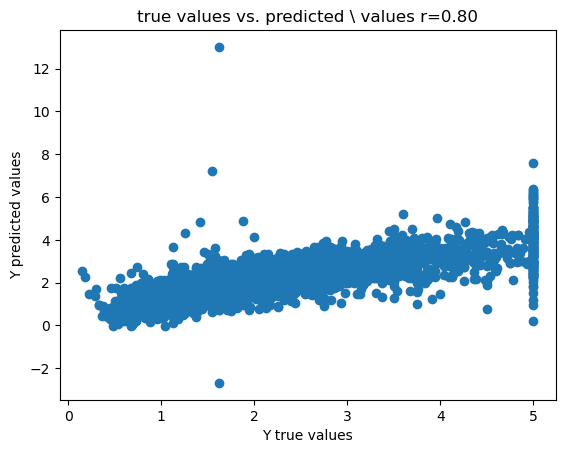

In [12]:
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr 
y_pred = polylr.predict(X_tested) 
plt.scatter(y_test,y_pred) 
plt.xlabel('Y true values') 
plt.ylabel('Y predicted values') 
pearson = pearsonr(y_test,y_pred)[0] 
plt.title('true values vs. predicted \ values r={:.2f}'.format(pearson))

In [14]:
from sklearn.linear_model import Ridge
ridge_coef=[]
for alpha in [10,1,0.1,0.001,0.00001]:
  ridge=Ridge(alpha).fit(X_trained,y_train)
  print('alpha={:}'.format(alpha))
  print("训练集得分:{:.2f}".format(ridge.score(X_trained,y_train)))
  print("测试集得分:{:.2f}".format(ridge.score(X_tested,y_test)))
  print("模型用到的特征数目:{}".format(np.sum(ridge.coef_!= 0)))
  ridge_coef.append(ridge.coef_)

alpha=10
训练集得分:0.61
测试集得分:0.59
模型用到的特征数目:44
alpha=1
训练集得分:0.63
测试集得分:0.60
模型用到的特征数目:44
alpha=0.1
训练集得分:0.65
测试集得分:0.62
模型用到的特征数目:44
alpha=0.001
训练集得分:0.67
测试集得分:0.62
模型用到的特征数目:44
alpha=1e-05
训练集得分:0.68
测试集得分:0.64
模型用到的特征数目:44


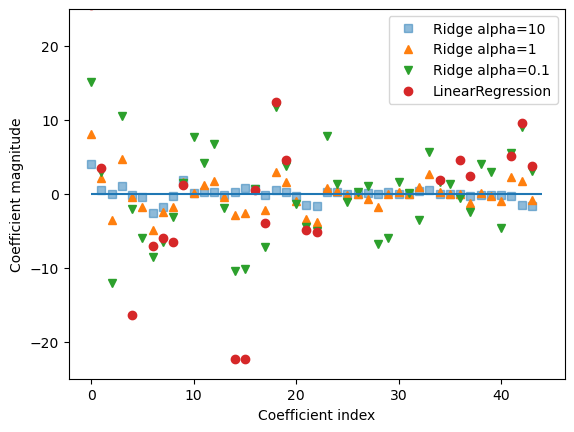

In [15]:
import matplotlib.pyplot as plt
plt.plot(ridge_coef[0],'s',label="Ridge alpha=10",alpha=0.5)
plt.plot(ridge_coef[1],'^',label="Ridge alpha=1")
plt.plot(ridge_coef[2],'v',label="Ridge alpha=0.1")
plt.plot(polylr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(polylr.coef_))
plt.ylim(-25,25)
plt.legend(loc='best')

In [18]:
from sklearn.linear_model import Lasso
lasso_coef=[]
for alpha in [0.01,0.001,0.00001]:
  lasso=Lasso(alpha=alpha,max_iter=100000).fit(X_trained,y_train)
  print('alpha={:}'.format(alpha))
  print("训练集得分:{:.2f}".format(lasso.score(X_trained,y_train)))
  print("测试集得分:{:.2f}".format(lasso.score(X_tested,y_test)))
  print("模型用到的特征数目:{}".format(np.sum(lasso.coef_!= 0)))
  lasso_coef.append(lasso.coef_)

alpha=0.01
训练集得分:0.55
测试集得分:0.54
模型用到的特征数目:4
alpha=0.001
训练集得分:0.61
测试集得分:0.59
模型用到的特征数目:10
alpha=1e-05
训练集得分:0.66
测试集得分:0.62
模型用到的特征数目:35


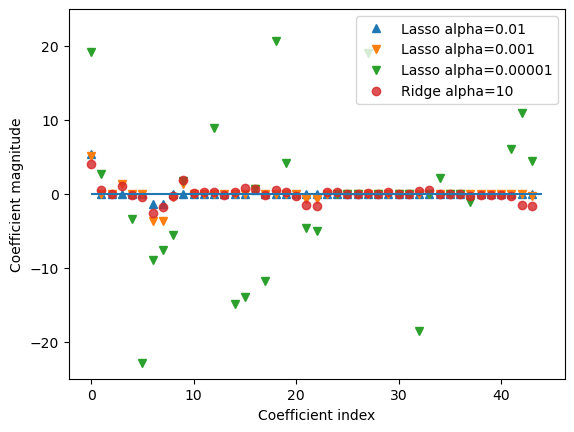

In [19]:
plt.plot(lasso_coef[0],'^',label="Lasso alpha=0.01")
plt.plot(lasso_coef[1],'v',label="Lasso alpha=0.001")
plt.plot(lasso_coef[2],'v',label="Lasso alpha=0.00001")
plt.plot(ridge_coef[0],'o',label="Ridge alpha=10",alpha=0.8)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(polylr.coef_))
plt.ylim(-25,25)
plt.legend(loc='best')

In [21]:
from sklearn.linear_model import ElasticNet
for alpha in [0.01,0.001,0.00001]:
  elastic_net = ElasticNet(alpha=alpha,l1_ratio=0.8,random_state=3,
  max_iter=100000).fit(X_trained,y_train)
  print('alpha={:}'.format(alpha))
  print("训练集得分:{:.2f}".format(elastic_net.score(X_trained,y_train)))
  print("测试集得分:{:.2f}".format(elastic_net.score(X_tested,y_test)))
  print("模型用到的特征数目:{}".format(np.sum(elastic_net.coef_!= 0)))

alpha=0.01
训练集得分:0.55
测试集得分:0.53
模型用到的特征数目:8
alpha=0.001
训练集得分:0.61
测试集得分:0.59
模型用到的特征数目:11
alpha=1e-05
训练集得分:0.65
测试集得分:0.63
模型用到的特征数目:38


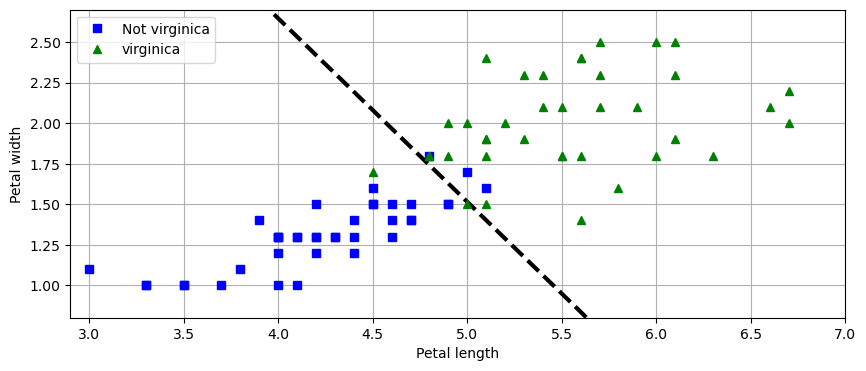

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# 数据处理
iris = load_iris()
X = iris.data[:,2:] # “petal length”和“petal width”
y = (iris.target_names[iris.target] == 'virginica').astype(int)

# 训练Logistic回归分类器，令C=2
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# 绘制决策边界
x0_left_right = np.array([2.9, 7]) #取"petal length:2.9和7两个值"作为x轴最小和最大值
x1_top_down = -((log_reg.coef_[0, 0] * x0_left_right + log_reg.intercept_[0]) / log_reg.coef_[0, 1]) # "计算petal width对应值"
plt.figure(figsize=(10, 4))
plt.plot(x0_left_right, x1_top_down, "k--", linewidth=3)
plt.plot(X_train[y_train==0, 0],X_train[y_train==0,1],"bs",label="Not virginica")
plt.plot(X_train[y_train==1, 0],X_train[y_train==1,1],"g^",label="virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="best")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()


In [4]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer() #返回bunch对象
cancer.data.shape # cancer.data是数据矩阵

(569, 30)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,
random_state=42)
logreg=LogisticRegression(max_iter=10000).fit(X_train,y_train)
print("训练得分：{:.3f}".format(logreg.score(X_train,y_train)))
print("测试得分：{:.3f}".format(logreg.score(X_test,y_test)))

训练得分：0.958
测试得分：0.958


In [6]:
logreg100=LogisticRegression(C=100,max_iter=10000).fit(X_train,y_train)
print("训练得分：{:.3f}".format(logreg100.score(X_train,y_train)))
print("测试得分：{:.3f}".format(logreg100.score(X_test,y_test)))

训练得分：0.981
测试得分：0.965


d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
logreg100=LogisticRegression(C=100,max_iter=10000).fit(X_train,y_train)
print("训练得分：{:.3f}".format(logreg100.score(X_train,y_train)))
print("测试得分：{:.3f}".format(logreg100.score(X_test,y_test)))

训练得分：0.981
测试得分：0.965


d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
logreg001=LogisticRegression(C=0.01,max_iter=10000).fit(X_train,y_train)
print("训练得分：{:.3f}".format(logreg001.score(X_train,y_train)))
print("测试得分：{:.3f}".format(logreg001.score(X_test,y_test)))

训练得分：0.953
测试得分：0.951


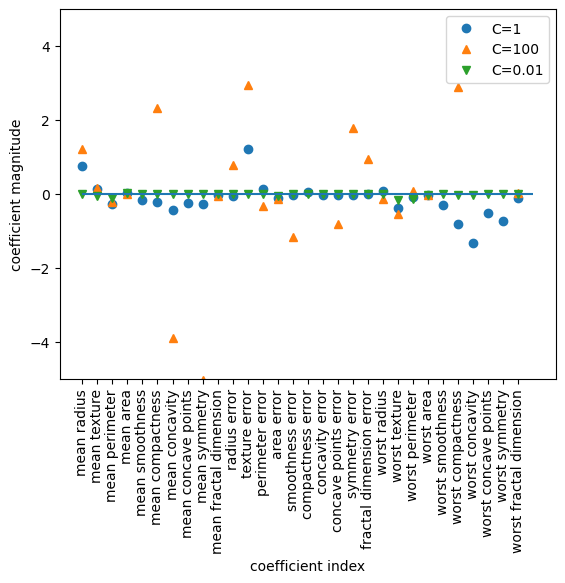

In [10]:
import matplotlib.pyplot as plt
plt.plot(*logreg.coef_,'o',label='C=1') #取出二维数组logreg.coef_的元素,一维数组
plt.plot(*logreg100.coef_,'^',label="C=100")
plt.plot(*logreg001.coef_,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1]) # 横轴0~30，纵轴都是0
plt.ylim(-5,5)
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.legend()

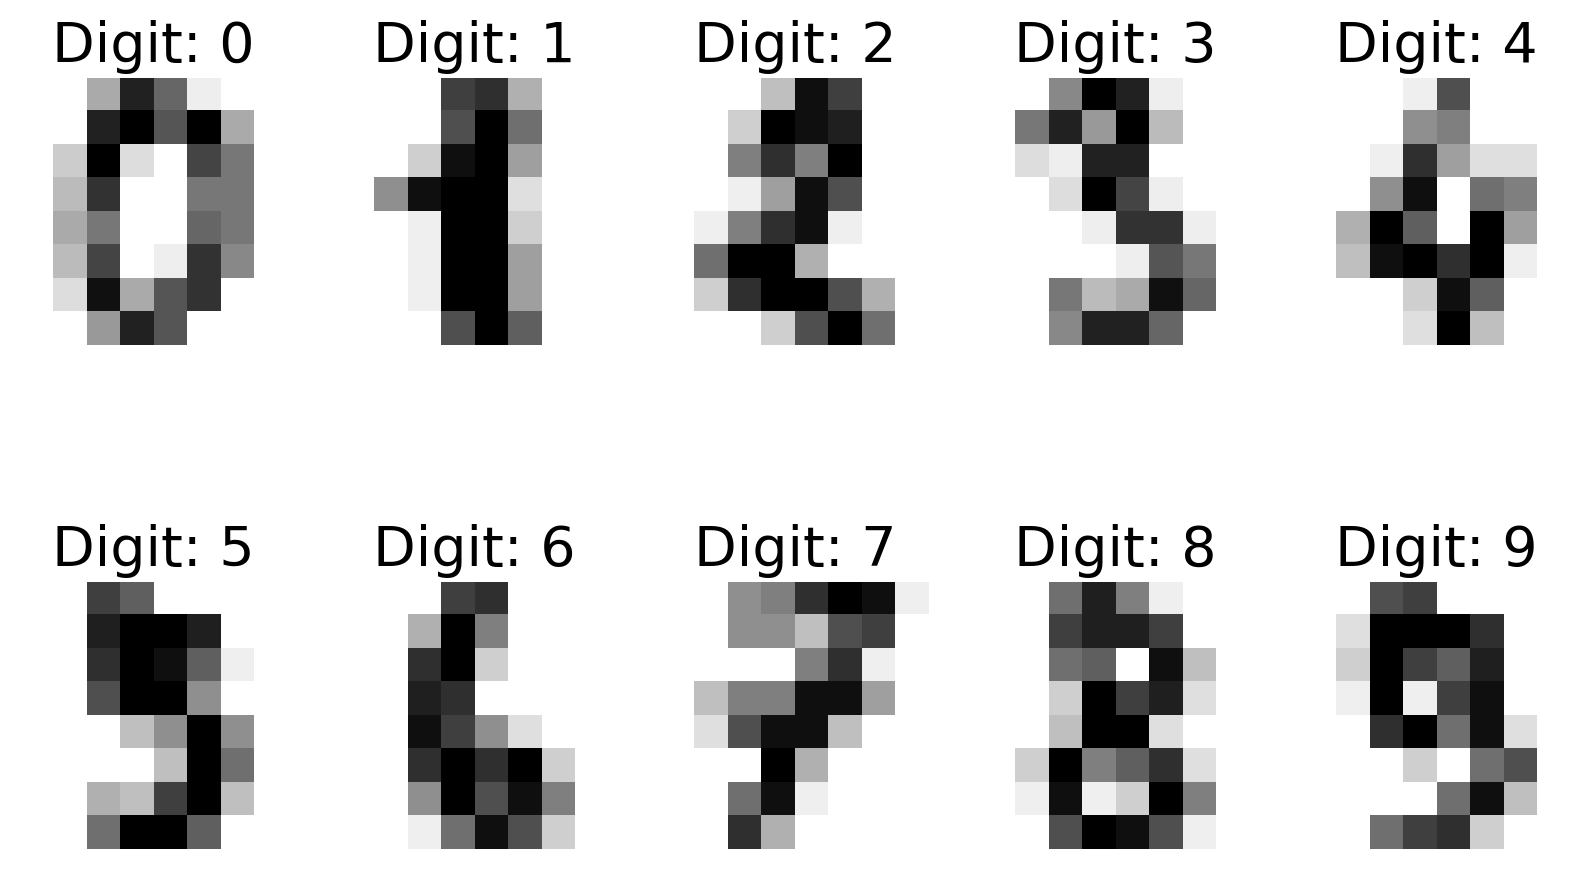

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets

# 加载数据集
digits = datasets.load_digits()

# 准备图像和标签
images_and_labels = list(zip(digits.images, digits.target))

# 创建一个2x5的子图布局
plt.figure(figsize=(10, 6), dpi=200)

# 遍历前10个图像
for index, (image, label) in enumerate(images_and_labels[:10]):
    # 在2x5布局中添加子图
    plt.subplot(2, 5, index + 1)
    plt.axis('off')  # 关闭坐标轴
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')  # 显示图像
    plt.title('Digit: %i' % label, fontsize=20)  # 设置标题

# 显示所有子图
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import datasets

# 加载数据集
digits = datasets.load_digits()

# 提取特征和标签
X = digits.data
y = digits.target

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将标签转换为one-hot编码
y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 构建模型
model = Sequential([
    Dense(64, input_shape=(64,), activation='relu'),  # 输入层和第一个隐藏层
    Dense(10, activation='softmax')  # 输出层
])

# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 4810 (18.79 KB)
Trainable params: 4810 (18.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# 训练模型
history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=32, validation_split=0.1)

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/100
41/41 [==============================] - 1s 6ms/step - loss: 1.9362 - accuracy: 0.3596 - val_loss: 1.4417 - val_accuracy: 0.6389
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 1.0055 - accuracy: 0.7773 - val_loss: 0.8793 - val_accuracy: 0.8056
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.8770 - val_loss: 0.6083 - val_accuracy: 0.8750
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.9258 - val_loss: 0.4573 - val_accuracy: 0.9167
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.9435 - val_loss: 0.3695 - val_accuracy: 0.9236
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9590 - val_loss: 0.3229 - val_accuracy: 0.9236
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9683 - val_loss: 0.2837 - val_accuracy: 0.9375
Epoch 8/100
4

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
Xtrain,Xtest,Ytrain,Ytest=train_test_split(digits.data,digits.target, test_size=0.2,random_state=42); 
# 默认multi_class='auto'自适应类别数 
clf = LogisticRegression(C=0.01, random_state=42,max_iter=10_000)  
clf.fit(Xtrain, Ytrain)

LogisticRegression(C=0.01, max_iter=10000, random_state=42)

In [7]:
print("在测试集上的准确度为：{:.3f}".format(clf.score(Xtest,Ytest)))
print("在训练集上的准确度为：{:.3f}".format(clf.score(Xtrain,Ytrain)))
from sklearn.metrics import classification_report
Y_pred = clf.predict(Xtest)
print(classification_report(Ytest,Y_pred))

在测试集上的准确度为：0.975
在训练集上的准确度为：0.991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.97      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



In [35]:
import numpy as np    
from sklearn.datasets import load_breast_cancer    

import pandas as pd    

cancer=load_breast_cancer() # bunch对象   
X=cancer.data # 形状(569, 30)   
y=cancer.target # 形状(569,)   
print(X.shape) # (569, 30)
print(y.shape) # (569,)

features_mean = [X.mean(axis=0)] # 各列的均值     
features_var = [X.var(axis=0)]    
features_scale =[X.max(axis=0)-X.min(axis=0)]   

df = pd.DataFrame({'特征均值':[np.min(features_mean),np.max(features_mean)], 
                   '特征方差':[np.min(features_var),np.max(features_var)], 
                   '特征区间范围':[np.min(features_scale),np.max(features_scale)]}, index=['最小','最大'])
print(df)

(569, 30)
(569,)
          特征均值           特征方差       特征区间范围
最小    0.003795       0.000007     0.028945
最大  880.583128  323597.670893  4068.800000


In [39]:
# 数据规范化预处理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# 进行训练集和测试集的划分
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42)
scaler = StandardScaler()
Xtrain_new = scaler.fit_transform(X_train)
Xtest_new = scaler.transform(X_test)

# 用规范化后的训练集数据训练模型
from sklearn.linear_model import LogisticRegression

models = []
for i in [0.1, 1, 10, 100]:
    logreg = LogisticRegression(C=i, max_iter=1000).fit(Xtrain_new, y_train)
    print("C={}, 训练得分：{:.3f}".format(i, logreg.score(Xtrain_new, y_train)))
    print("C={}, 测试得分：{:.3f}\n".format(i, logreg.score(Xtest_new, y_test)))
    models.append((i, logreg))

C=0.1, 训练得分：0.984
C=0.1, 测试得分：0.979

C=1, 训练得分：0.988
C=1, 测试得分：0.986

C=10, 训练得分：0.991
C=10, 测试得分：0.972

C=100, 训练得分：0.995
C=100, 测试得分：0.951



In [43]:
# 用规范化后的训练集数据训练模型
from sklearn.linear_model import LogisticRegression

models = []
# 训练模型
logreg = LogisticRegression(C=1, max_iter=1000).fit(Xtrain_new, y_train)

# 预测类别和概率
predictions = logreg.predict(Xtest_new)  # 预测类别
probabilities = logreg.predict_proba(Xtest_new)  # 预测概率

# 输出预测结果
for i in range(1,11):
    print("样本 {}: 预测类别 = {}, 概率 = {}".format(i, predictions[i], probabilities[i]))

样本 1: 预测类别 = 0, 概率 = [9.9965176e-01 3.4823951e-04]
样本 2: 预测类别 = 1, 概率 = [0.44076125 0.55923875]
样本 3: 预测类别 = 1, 概率 = [0.06011142 0.93988858]
样本 4: 预测类别 = 0, 概率 = [0.8244832 0.1755168]
样本 5: 预测类别 = 0, 概率 = [9.99999040e-01 9.59859873e-07]
样本 6: 预测类别 = 0, 概率 = [0.99726694 0.00273306]
样本 7: 预测类别 = 0, 概率 = [9.99242420e-01 7.57580232e-04]
样本 8: 预测类别 = 0, 概率 = [9.99320208e-01 6.79792123e-04]
样本 9: 预测类别 = 1, 概率 = [9.13822710e-05 9.99908618e-01]
样本 10: 预测类别 = 1, 概率 = [0.3021715 0.6978285]


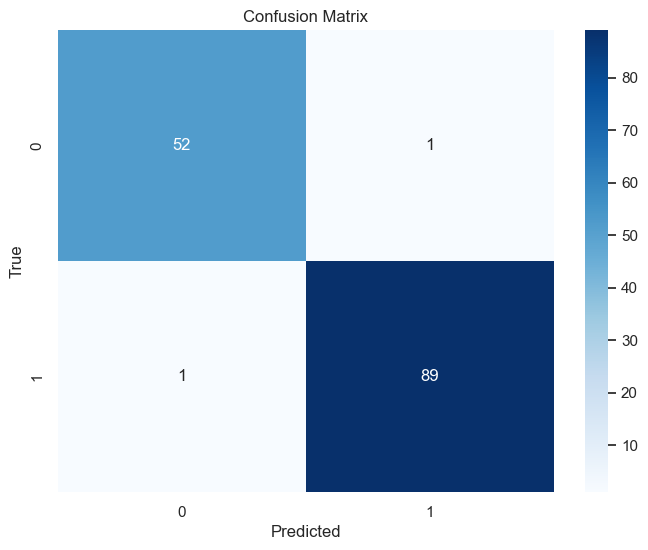

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 生成混淆矩阵
cm = confusion_matrix(y_test, predictions)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 生成分类报告
report = classification_report(y_test, predictions)
print(report)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 加载乳腺癌数据集
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 拆分数据集为75%训练集和25%测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 输出训练集和测试集的形状
print("训练集形状:", X_train.shape, y_train.shape)
print("测试集形状:", X_test.shape, y_test.shape)

训练集形状: (426, 30) (426,)
测试集形状: (143, 30) (143,)


In [2]:
from sklearn.svm import LinearSVC

# 初始化LinearSVC分类器
lin_svc = LinearSVC(C=1,loss="hinge",max_iter=1000,random_state=42)

# 训练模型
lin_svc.fit(X_train, y_train)

# 输出训练集得分
train_score = lin_svc.score(X_train, y_train)
print("训练集得分:", train_score)

# 输出测试集得分
test_score = lin_svc.score(X_test, y_test)
print("测试集得分:", test_score)

训练集得分: 0.9225352112676056
测试集得分: 0.9370629370629371


d:\py\Anaconda3\envs\pytorch_gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 加载乳腺癌数据集
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 拆分数据集为75%训练集和25%测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 对数据进行标准化处理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化LinearSVC分类器
svc = LinearSVC(random_state=42, max_iter=10000)

# 训练模型
svc.fit(X_train_scaled, y_train)

# 输出训练集得分
train_score = svc.score(X_train_scaled, y_train)
print("训练集得分:", train_score)

# 输出测试集得分
test_score = svc.score(X_test_scaled, y_test)
print("测试集得分:", test_score)

训练集得分: 0.9882629107981221
测试集得分: 0.965034965034965


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
rbf_svc2=make_pipeline(MinMaxScaler(), 
SVC(kernel='rbf',C=100,gamma=0.1,random_state=42))
rbf_svc2.fit(X_train,y_train) #模型训练
print("交叉验证得分：{:.4f}".format(cross_val_score(rbf_svc2,X_train,y_train).mean()))

交叉验证得分：0.9671


In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# 设置交叉验证参数
tuned_parameters = [
{"kernel": ["rbf"], "gamma": [1,0.1,1e-2,1e-3, 1e-4], "C": [1, 10, 100, 1000,10_000]},
{"kernel": ["linear"], "C": [0.1, 1, 10, 100, 1000]},
{"kernel":["poly"],"gamma":[10,1,0.1,1e-2,1e-3,1e-4],"C":[1e-4,1e-3,1e-2,0.1,1,10],
"degree":[2,3,4,5,6]}]
clf = GridSearchCV(SVC(), tuned_parameters)
clf.fit(X_train_scaled, y_train)
print(f"最优超参数组合:{clf.best_params_}")
print(f"最优模型交叉验证得分：{clf.best_score_:.4f}")

最优超参数组合:{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
最优模型交叉验证得分：0.9789


In [11]:
best_clf = clf.best_estimator_
best_clf.fit(X_train_scaled,y_train)
print(f'最优svc的测试得分:{best_clf.score(X_test_scaled,y_test):.4f}')
print("\n详细的分类报告:\n")
y_true, y_pred = y_test, best_clf.predict(X_test_scaled)
print(classification_report(y_true, y_pred))

最优svc的测试得分:0.9720

详细的分类报告:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 加载乳腺癌数据集
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 拆分数据集为75%训练集和25%测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 创建MinMaxScaler实例，设置缩放范围为[-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))

# 拟合并转换训练集
X_train_scaled = scaler.fit_transform(X_train)

# 仅转换测试集
X_test_scaled = scaler.transform(X_test)

# 输出缩放后的数据
print("缩放后的训练集数据范围:", X_train_scaled.min(), X_train_scaled.max())
print("缩放后的测试集数据范围:", X_test_scaled.min(), X_test_scaled.max())

缩放后的训练集数据范围: -1.0 1.0000000000000004
缩放后的测试集数据范围: -1.1142552055525892 1.6528799133972905


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

clf = SVC(probability = True,random_state=1)
search_dict = {'kernel':['linear','rbf'], 'C':loguniform(1,1000),'gamma':loguniform(0.0001,0.1)}
random_search = RandomizedSearchCV(estimator = clf, param_distributions = search_dict, scoring='accuracy', cv=5)
random_search.fit(X_train,y_train)

print('最优得分: %0.3f' % random_search.best_score_)
print("最优超参数组合:",random_search.best_params_)
print('测试得分: %0.3f' % random_search.score(X_test, y_test))

最优得分: 0.960
最优超参数组合: {'C': 34.7622250644291, 'gamma': 0.031433819838160494, 'kernel': 'linear'}
测试得分: 0.944


In [14]:
from sklearn.metrics import classification_report

best_clf = random_search.best_estimator_
best_clf.fit(X_train,y_train)
print(f'最优svc的测试得分:{best_clf.score(X_test,y_test):.4f}')
print("\n详细的分类报告:\n")

y_true, y_pred = y_test, best_clf.predict(X_test)
print(classification_report(y_true, y_pred))

最优svc的测试得分:0.9441

详细的分类报告:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        54
           1       0.96      0.96      0.96        89

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [15]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), SVR())
param_distrib = {'svr__kernel':['linear','rbf'],"svr__gamma": loguniform(0.0001, 0.1),"svr__C": loguniform(1, 1000) }
rnd_search_cv = RandomizedSearchCV(estimator = pipe,param_distributions=param_distrib,n_iter=10, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014BA1D77F10>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014BA1D77C70>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
best_svr = rnd_search_cv.best_estimator_
print('最优超参数',rnd_search_cv.best_params_)
print(f"在训练集上的交叉验证分数(R^2):{rnd_search_cv.best_score_:.4f}")
print(f"在测试集上的得分(R^2):{best_svr.score(X_test,y_test):.4f}")
train_rmse = -cross_val_score(best_svr, X_train, y_train,
scoring="neg_root_mean_squared_error").mean()
print(f"在训练集上的rmse:{train_rmse:.4f}")
y_pred = best_svr.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False) 
print(f"在测试集上的rmse:{test_rmse:.4f}")

最优超参数 {'svr__C': 1.1527987128232398, 'svr__gamma': 0.08123245085588685, 'svr__kernel': 'rbf'}
在训练集上的交叉验证分数(R^2):0.7427
在测试集上的得分(R^2):0.7202
在训练集上的rmse:0.6044
在测试集上的rmse:0.6055


In [18]:
import joblib
joblib.dump(best_svr,'california_housing_svm.pkl')

['california_housing_svm.pkl']

In [20]:
model=joblib.load('california_housing_svm.pkl')
Ypred=model.predict(X_test[0:4]);
print(Ypred)

[0.62965689 1.67777369 3.14449163 2.42677263]
